<a href="https://colab.research.google.com/github/kylo-dev/gachon-machinelearning/blob/main/%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5_%EA%B3%BC%EC%A0%9C1_%EA%B9%80%ED%98%84%EA%B2%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터 불러오기

In [113]:
# 기본 라이브러리 설정
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
train = pd.read_csv('/content/drive/MyDrive/[6학기] 기계학습/data/titanic/train.csv')
test = pd.read_csv('/content/drive/MyDrive/[6학기] 기계학습/data/titanic/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/[6학기] 기계학습/data/titanic/gender_submission.csv')

print(train.shape, test.shape, submission.shape)

(891, 12) (418, 11) (418, 2)


### Train 데이터 속성 설명

* PassengerID : 고객번호
* Survived : 생존 여부 ( 0=사망 , 1=생존) 종속변수
* Pclass : 티켓의 등급 ( 1 > 2 > 3 )
* Name : 승객의 이름
* Sex : 성별
* Age : 연령
* Sibsp : 타이타닉호에 탑승한 형제/배우자 수
* Parch : 타이타닉호에 탑승한 부모/자녀의 수
* Ticket : 티켓 번호
* Fare : 승객 요금
* Cabin : 객실 번호
* Embarked : 기항지 위치

In [115]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [116]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S




**test 데이터에는 타겟이 없다. 즉, 훈련 데이터와 관련이 없는 데이터를 예측할 수만 있음.**




### Submission
모든 여성 승객만이 생존한다고 가정하는 예측 집합

캐글에서 test 데이터를 예측하고 정답 데이터를 담아 제출하는 데이터 형식

In [117]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## 데이터 구조

In [118]:
# train 데이터프레임 개요 정보
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [119]:
# train 데이터프레임 통계 정보
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 결측값 확인하기

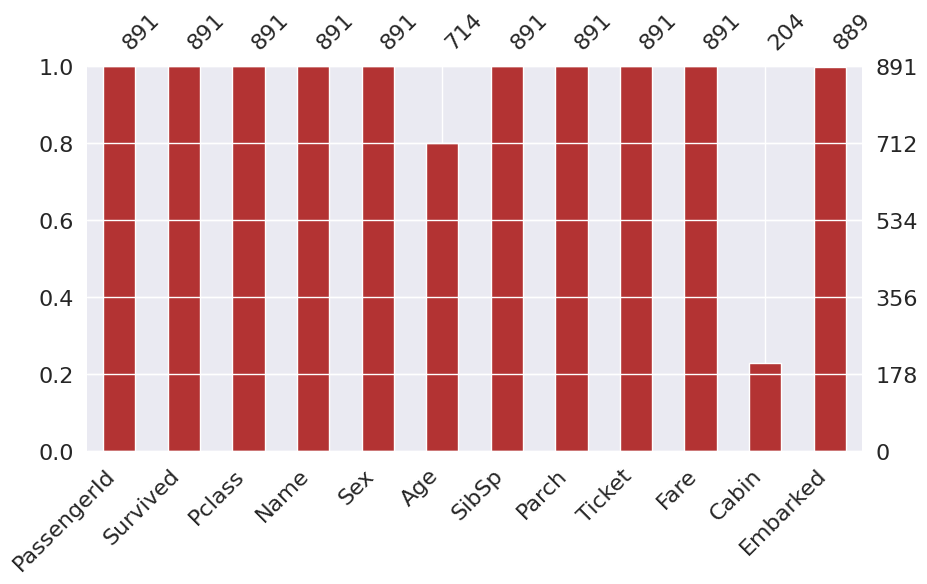

In [120]:
import missingno as msno
msno.bar(train, figsize=(10,5), color=(0.7, 0.2, 0.2))
plt.show()

In [121]:
print(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


총 데이터의 개수 891개
- Age 칼럼 결측치 177개
- Cabin 칼럼 결측치 687개
- Embarked 칼럼 결측치 2개

## 상관 관계 분석

<ipython-input-122-a3c6e9268b66>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot=True, cbar=True)


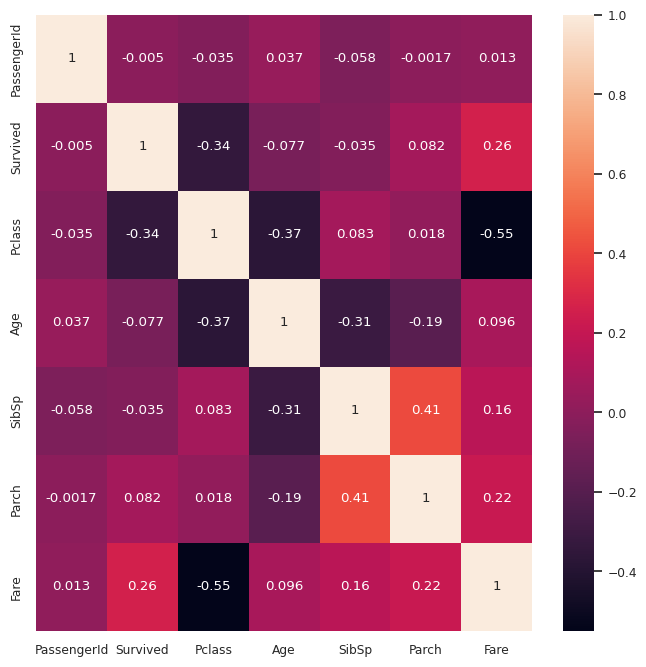

In [122]:
# 숫자형 변수 간의 상관관계를 계산하여 히트맵 그리기
plt.figure(figsize=(8, 8))
sns.set(font_scale=0.8)
sns.heatmap(train.corr(), annot=True, cbar=True)
plt.show()

**생존 여부를 나타내는 Survived와 Pclass, Fare 칼럼이 약한 상관관계를 가지고 있음**

## Survived 예측의 대상이 되는 레이블 확인하기

In [123]:
# 타깃 레이블 분포 확인
train['Survived'].value_counts(dropna=False)

0    549
1    342
Name: Survived, dtype: int64

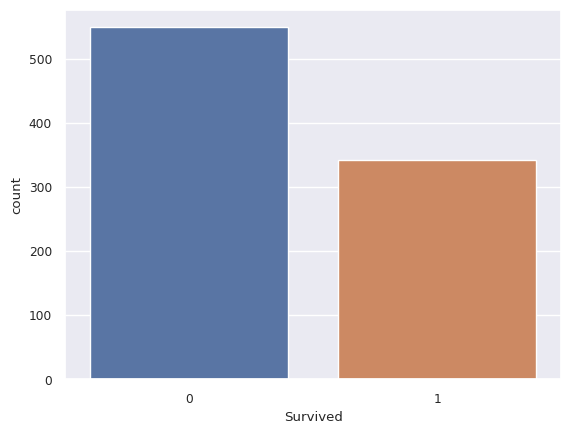

In [124]:
sns.countplot(x='Survived', data=train)
plt.show()

**훈련 데이터에서는 생존자보다 사망자의 수가 더 많은 것을 알 수 있다.**

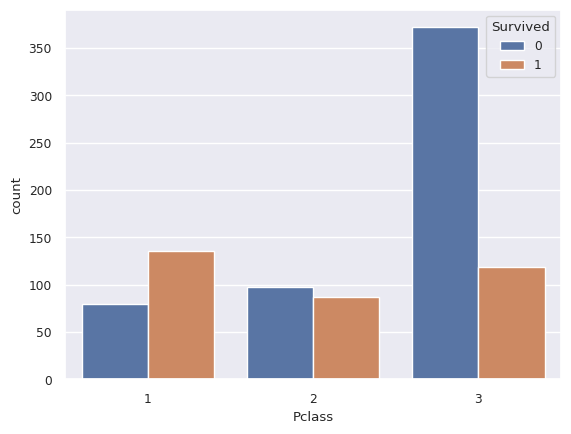

In [125]:
sns.countplot(x='Pclass', hue='Survived', data=train)
plt.show()

**등급이 낮을 수록 사망자의 수가 많다는 것을 알 수 있으며, 1등급에서 생존자가 가장 많은 것을 알 수 있다.**

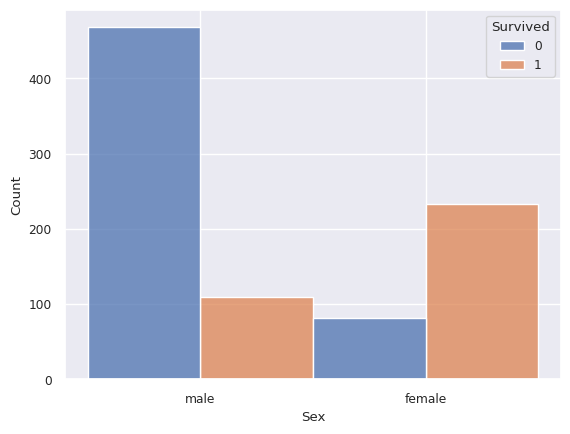

In [126]:
sns.histplot(x='Sex', hue='Survived',multiple='dodge', data=train)
plt.show()

**타이타닉 사건에서 남성이 여성보다 훨씬 더 많이 사망했음을 알 수 있다.**

## 데이터 결합
train과 test 데이터 합쳐서 전처리하기

In [127]:
# titanic 전체 데이터셋 준비
train['TrainSplit'] = 'Train'
test['TrainSplit'] = 'Test'
data = pd.concat([train, test], axis=0)
print(data.shape)

(1309, 13)


### 필요한 속성 추출하기 (Name)

#### 'Name' 속성 전처리

In [128]:
data['Name'].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina', ..., 'Saether, Mr. Simon Sivertsen',
       'Ware, Mr. Frederick', 'Peter, Master. Michael J'], dtype=object)

In [129]:
title_name = data['Name'].str.split(', ', expand=True)[1]
title_name

0                                 Mr. Owen Harris
1      Mrs. John Bradley (Florence Briggs Thayer)
2                                     Miss. Laina
3              Mrs. Jacques Heath (Lily May Peel)
4                               Mr. William Henry
                          ...                    
413                                     Mr. Woolf
414                                 Dona. Fermina
415                           Mr. Simon Sivertsen
416                                 Mr. Frederick
417                             Master. Michael J
Name: 1, Length: 1309, dtype: object

**Name열에서 str 속성을 이용하여 문자열을 추출하고, split 메소드를 통해 2개의 문자열로 나눈다.**

(타이틀 이름이 들어 있는 뒷부분의 문자열을 따로 추출한다.)

In [130]:
title = title_name.str.split(".",expand=True)[0]
title.value_counts(dropna=False)

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: 0, dtype: int64

In [131]:
# 비슷한 속성을 가진 타이틀끼리 같은 그룹으로 만든다.
title = title.replace(['Ms'],'Miss')
title = title.replace(['Mlle','the Countess','Lady','Don','Dona','Mme','Sir','Jonkheer'],'Noble')
title = title.replace(['Col','Major','Capt'],'Officer')
title = title.replace(['Dr','Rev'],'Priest')

data['Title'] = np.array(title)
data['Title'].value_counts(dropna=False)

Mr         757
Miss       262
Mrs        197
Master      61
Priest      16
Noble        9
Officer      7
Name: Title, dtype: int64

In [132]:
data=data.drop('Name',axis=1)
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'TrainSplit', 'Title'],
      dtype='object')

### 결측값 전처리 (Age, Embarked, Carbin, Fare)

Age : 결측값은 각 title의 평균 나이 값으로 대체한다.

In [133]:
# 결측값 확인 및 대체
for title in data['Title'].unique():

    # 결측값 개수 확인
    print("%s 결측값 개수 : "%title, data.loc[data['Title']==title,'Age'].isnull().sum())

    # 각 Title의 중간값으로 대체
    age_med = data.loc[data['Title']==title, 'Age'].median()
    data.loc[data['Title']==title, 'Age'] = data.loc[data['Title']==title, 'Age'].fillna(age_med)

Mr 결측값 개수 :  176
Mrs 결측값 개수 :  27
Miss 결측값 개수 :  51
Master 결측값 개수 :  8
Noble 결측값 개수 :  0
Priest 결측값 개수 :  1
Officer 결측값 개수 :  0


**각 title 별로 Age 변수의 결측값을 확인한 후, 각 title의 Age 평균으로 대체한다.**

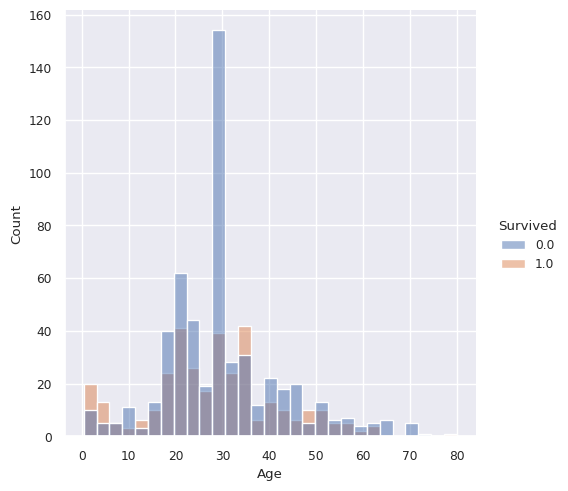

In [134]:
# Age 분포
sns.displot(x='Age', kind='hist', hue='Survived', data=data[data['TrainSplit']=='Train'])
plt.show()

**비교적 20\~30 사람들이 가장 많이 사망했으며, 나이가 어린 0~10 아이들이 비교적 많이 생존하였다.**

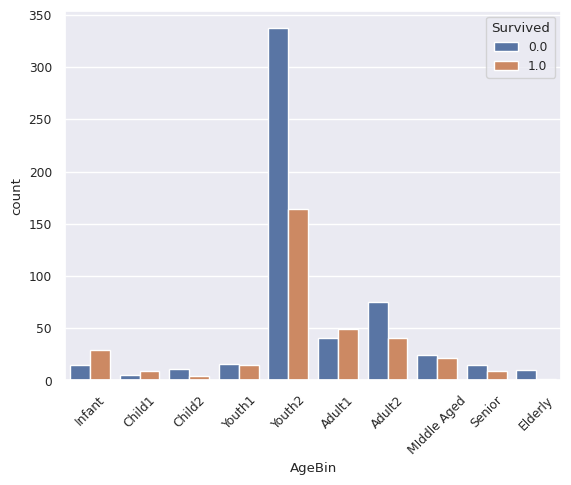

In [135]:
# Age 구간 나누기
bins = [0,4,8,12,16,32,36,48,56,64,100]
labels = ['Infant','Child1','Child2','Youth1','Youth2','Adult1','Adult2','MIddle Aged','Senior','Elderly']

data['AgeBin'] = pd.cut(data['Age'], bins=bins, labels=labels)

sns.countplot(x='AgeBin', hue='Survived', data=data[data['TrainSplit']=='Train'])
plt.xticks(rotation=45)
plt.show()

**Embarked 특성의 결측값은 최빈값으로 대체한다.**

In [136]:
data.loc[data['Embarked'].isnull(), :]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TrainSplit,Title,AgeBin
61,62,1.0,1,female,38.0,0,0,113572,80.0,B28,NaN,Train,Miss,Adult2
829,830,1.0,1,female,62.0,0,0,113572,80.0,B28,NaN,Train,Mrs,Senior


In [137]:
print("Embarked 열의 최빈갓 :", data['Embarked'].mode()[0])
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
data['Embarked'].value_counts(dropna=False)

Embarked 열의 최빈갓 : S


S    916
C    270
Q    123
Name: Embarked, dtype: int64

Carbin 특성의 결측값은 1014개로 많으므로 'U' 값으로 대체 한다. (unknown)

In [138]:
data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [139]:
data['Cabin'].str.slice(0,1).value_counts(dropna=False)

NaN    1014
C        94
B        65
D        46
E        41
A        22
F        21
G         5
T         1
Name: Cabin, dtype: int64

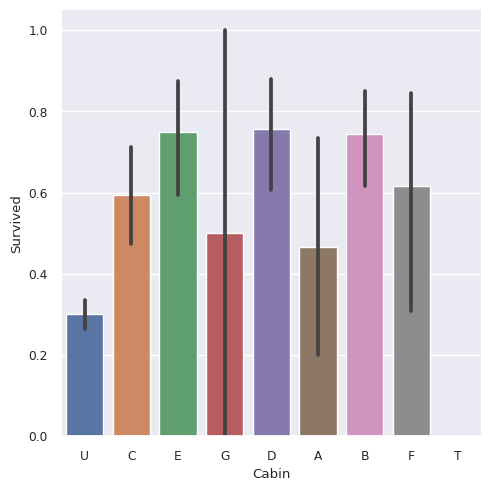

In [140]:
data['Cabin'] = data['Cabin'].str.slice(0,1)
data['Cabin'] = data['Cabin'].fillna('U')

sns.catplot(x='Cabin', y='Survived', kind='bar', data=data[data['TrainSplit']=='Train'])
plt.show()

### Ticket 특성 티켓의 고유 문자로 그룹화하기

In [141]:
data['Ticket'].value_counts(dropna=False)

CA. 2343        11
CA 2144          8
1601             8
PC 17608         7
S.O.C. 14879     7
                ..
113792           1
36209            1
323592           1
315089           1
359309           1
Name: Ticket, Length: 929, dtype: int64

In [142]:
data['Ticket'] = data['Ticket'].str.replace(".","").str.replace("/","")
data['Ticket'] = data['Ticket'].str.strip().str.split(' ').str[0]
data['Ticket'].value_counts(dropna=False)

<ipython-input-142-7e3deb94fafa>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Ticket'] = data['Ticket'].str.replace(".","").str.replace("/","")


PC         92
CA         68
A5         28
SOTONOQ    24
WC         15
           ..
239854      1
4134        1
11771       1
65304       1
359309      1
Name: Ticket, Length: 741, dtype: int64

In [143]:
data.loc[data['Ticket'].str.isdigit(),'Ticket'] = 'NUM'
data['Ticket'].value_counts(dropna=False)[:10]

NUM        957
PC          92
CA          68
A5          28
SOTONOQ     24
WC          15
SCPARIS     14
STONO       14
A4          10
FCC          9
Name: Ticket, dtype: int64

In [144]:
# test 데이터에서 결측값 1개를 0으로 수정
data["Fare"].fillna(0, inplace = True)

### 레이블 인코딩 (Sex, Embarked, Cabin, Ticket, Title, AgeBin)
레이블 인코딩은 피처 변수를 모델에 돌리기 위해서는 문자형의 데이터를 기계가 읽을 수 있게 변경해주는 것을 의미한다.

#### 'Sex' 칼럼 전처리

In [145]:
data.loc[data['Sex']=='female', 'Sex'] = 0
data.loc[data['Sex']=='male', 'Sex'] = 1
data['Sex'] = data['Sex'].astype(int)

data['Sex'].value_counts(dropna=False)

1    843
0    466
Name: Sex, dtype: int64

**'Sex' 칼럼을 여자인 경우 0으로 남자인 경우 1로 인코딩하였습니다.**

In [146]:
# 범주형 변수로 변환 및 원핫 인코딩

onehot_prefix = []
for col in ['Embarked','Cabin','Ticket','Title', 'AgeBin']:
    data[col] = data[col].astype('category')
    data = pd.get_dummies(data, columns = [col], prefix=col[:3],drop_first=True)
    onehot_prefix.append(col[:3])

data.loc[:,[col for col in data.columns if col[:3] in onehot_prefix]].head()

,Age,Emb_Q,Emb_S,Cab_B,Cab_C,Cab_D,Cab_E,Cab_F,Cab_G,Cab_T,...,Tit_Priest,Age_Child1,Age_Child2,Age_Youth1,Age_Youth2,Age_Adult1,Age_Adult2,Age_MIddle Aged,Age_Senior,Age_Elderly
0,22.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,38.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,26.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,35.0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,35.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### 표준화

#### 데이터 분리

**PassengerId, Survived, TrainSplit 속성을 제외한 속성들을 표준화하기**

In [147]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled_cols = [col for col in data.loc[:,'Pclass':].columns if col !='TrainSplit']

data_scaled = data.loc[:, scaled_cols]
data_scaled = scaler.fit_transform(data_scaled)

data.loc[:, scaled_cols] = data_scaled[:, :]
data.head()

<ipython-input-147-cffb01e2ccd4>:9: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:, scaled_cols] = data_scaled[:, :]


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,TrainSplit,Emb_Q,...,Tit_Priest,Age_Child1,Age_Child2,Age_Youth1,Age_Youth2,Age_Adult1,Age_Adult2,Age_MIddle Aged,Age_Senior,Age_Elderly
0,1,0.0,1.0,1.0,0.273456,0.125,0.0,0.014151,Train,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2,1.0,0.0,0.0,0.473882,0.125,0.0,0.139136,Train,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3,1.0,1.0,0.0,0.323563,0.000,0.0,0.015469,Train,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4,1.0,0.0,0.0,0.436302,0.125,0.0,0.103644,Train,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5,0.0,1.0,1.0,0.436302,0.000,0.0,0.015713,Train,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [148]:
selected_features = data.columns[2:]
len(selected_features)

68

In [149]:
x_train = data.loc[data['TrainSplit']=='Train', selected_features]
x_train = x_train.drop('TrainSplit', axis=1)
y_train = data.loc[data['TrainSplit']=='Train', 'Survived']

x_test = data.loc[data['TrainSplit']=='Test', selected_features]
x_test = x_test.drop('TrainSplit', axis=1)
print('Train 데이터셋 크기:', x_train.shape, y_train.shape)
print('Test 데이터셋 크기:', x_test.shape)

Train 데이터셋 크기: (891, 67) (891,)
Test 데이터셋 크기: (418, 67)


## 훈련 데이터 검증 데이터 나누기

stratify=y_train : 통해서 타겟값이 균일하게 나눠지도록 하였습니다.

sub_\*\*과 val_** 를 8:2 비율로 나누어 훈련 및 검증 평가를 진행하였습니다.

In [150]:
from sklearn.model_selection import train_test_split

sub_input, val_input, sub_target, val_target = train_test_split(x_train, y_train, random_state=201935247, stratify=y_train)

In [151]:
print(sub_input.shape)
print(val_input.shape)

(668, 67)
(223, 67)


## SGD 분류 모델

In [152]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(random_state=201935247)
param_grid = {
    'alpha': [0.0001, 0.001, 0.01],
    'loss': ['hinge', 'log_loss'],
    'penalty': ['l2', 'l1'],
    'max_iter': [100, 500, 1000],
}

grid_search = GridSearchCV(sc, param_grid, cv=5)
grid_search.fit(sub_input, sub_target)

GridSearchCV(cv=5, estimator=SGDClassifier(random_state=201935247),
             param_grid={'alpha': [0.0001, 0.001, 0.01],
                         'loss': ['hinge', 'log_loss'],
                         'max_iter': [100, 500, 1000],
                         'penalty': ['l2', 'l1']})

### 그리드서치 결과

In [153]:
print("최적의 모델 파라미터 보기 : ", grid_search.best_params_)

print("각 조합에 대한 교차 검증 평균 값 : ",np.max(grid_search.cv_results_['mean_test_score']))

print("검증 데이터 score 값 : ", grid_search.score(val_input, val_target))

최적의 모델 파라미터 보기 :  {'alpha': 0.001, 'loss': 'hinge', 'max_iter': 100, 'penalty': 'l2'}
각 조합에 대한 교차 검증 평균 값 :  0.8278419930423071
검증 데이터 score 값 :  0.8251121076233184



**최적화 방법 단계별 설명**

* 모델 선택: 먼저 SGDClassifier 모델을 선택했습니다. 이 모델은 확률적 경사 하강법을 사용하여 분류 문제를 해결하는데 사용됩니다.

* 하이퍼 파라미터 그리드 생성: param_grid 딕셔너리를 생성하여 모델의 하이퍼파라미터 튜닝에 사용할 후보값을 정의했습니다.

* 그리드 서치 설정: GridSearchCV 객체를 생성하고, 최적의 하이퍼파라미터 조합을 찾기 위해 교차 검증을 사용하도록 설정했습니다. 이 경우, 5-폴드 교차 검증을 사용하여 각 하이퍼 파라미터 조합의 성능을 평가합니다.

* 최적 모델 검색: fit 메서드를 호출하여 그리드 서치를 실행하고, 교차 검증을 통해 최적의 하이퍼파라미터 조합을 찾았습니다.


---


**왜 이런 파라미터를 수정하는가?**

* 'alpha': 정규화 강도를 조절하는 파라미터로, 모델의 과적합을 방지하기 위해 조정합니다.

* 'loss': 손실 함수를 선택하는 파라미터로, 모델의 학습 방식에 영향을 미칩니다.

* 'penalty': 정규화 방법을 선택하는 파라미터로, 모델의 복잡도를 조절합니다. L1 또는 L2 정규화를 시도하여 어떤 것이 더 나은 결과를 가져오는지 확인합니다.

* 'max_iter': 최대 반복 횟수를 지정하는 파라미터로, 모델이 수렴할 때까지 얼마나 많은 반복을 할지 결정합니다.

---


**왜 이렇게 파라미터 범위를 정했는가?**

* 'alpha'의 범위를 [0.0001, 0.001, 0.01]로 설정한 이유는 강한 정규화 강도부터 약한 강도를 3가지 단계로 훈련해 적합한 것을 찾고자 하였습니다.

* 'loss'는 대표적인 두 손실 함수로 어느 함수가 더 적합한지 찾고자 하였습니다.

* 'penalty'는 대표적인 두 정규화 방법 중 어느 방법이 더 적합한지 찾고자 하였습니다.

---


**왜 이런 파라미터를 최종적으로 선택했는가?**

최종적으로 선택된 하이퍼파라미터는 교차 검증을 통해 모델의 성능이 가장 높았기 때문에 선택했습니다.

### 높은 특성 중요도를 가진 특성 찾기

In [154]:
# 최적화 된 모델
best_model = grid_search.best_estimator_

best_model.fit(sub_input, sub_target)
feature_importances = best_model.coef_

In [155]:
# 각 특성의 중요도와 해당 특성 이름을 매핑
feature_names = [f"Feature_{i}" for i in range(len(sub_input.columns))]
feature_importance_map = dict(zip(feature_names, feature_importances[0]))

# 중요도가 높은 순으로 정렬
sorted_feature_importance = sorted(feature_importance_map.items(), key=lambda x: abs(x[1]), reverse=True)

for feature, importance in sorted_feature_importance[:10]:
    print(f"{feature}: {importance}")

Feature_3: -2.9983131221252903
Feature_53: -2.1601355326380984
Feature_49: 2.025127061848213
Feature_11: 1.9801242382515865
Feature_57: -1.7551101202684503
Feature_42: -1.4850931786886887
Feature_4: -1.4450906688250205
Feature_51: -1.3500847078988083
Feature_55: -1.2150762371089283
Feature_5: 1.1937010351809463


In [156]:
most_important_feature_index = []
for feature, importance in sorted_feature_importance[:10]:
    index = feature.split('_')[1]
    most_important_feature_index.append(int(index))

print(most_important_feature_index)
most10_input = sub_input.iloc[:, most_important_feature_index]

[3, 53, 49, 11, 57, 42, 4, 51, 55, 5]


### 선택된 특성의 모델 최적화하기

In [157]:
# 랜덤 포레스트 모델 초기화
sc = SGDClassifier(random_state=201935247)

# 탐색할 하이퍼파라미터 그리드 설정
param_grid = {
    'alpha': [0.0001, 0.001, 0.01],
    'loss': ['hinge', 'log_loss'],
    'penalty': ['l2', 'l1'],
    'max_iter': [100, 500, 1000],
}

# GridSearchCV를 사용하여 최적 모델 찾기
grid_search = GridSearchCV(sc, param_grid, cv=5)
grid_search.fit(most10_input, sub_target)

GridSearchCV(cv=5, estimator=SGDClassifier(random_state=201935247),
             param_grid={'alpha': [0.0001, 0.001, 0.01],
                         'loss': ['hinge', 'log_loss'],
                         'max_iter': [100, 500, 1000],
                         'penalty': ['l2', 'l1']})

In [158]:
print("최적의 모델 파라미터 보기 : " + str(grid_search.best_params_))

print("각 조합에 대한 교차 검증 평균 값 : ",np.max(grid_search.cv_results_['mean_test_score']))

val10_input = val_input.iloc[:, most_important_feature_index]
print("검증 데이터 score 값 : ", grid_search.score(val10_input, val_target))

최적의 모델 파라미터 보기 : {'alpha': 0.0001, 'loss': 'hinge', 'max_iter': 100, 'penalty': 'l2'}
각 조합에 대한 교차 검증 평균 값 :  0.8248344742453148
검증 데이터 score 값 :  0.8116591928251121


## 결정트리 모델

In [159]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=201935247)

params = {'min_impurity_decrease': [0.0001, 0.0005, 0.001, 0.0015],
          'max_depth': [5, 10, 15, 20],
          'min_samples_split': [2, 20, 40, 60]
          }

grid_search = GridSearchCV(dt, params)
grid_search.fit(sub_input, sub_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=201935247),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_impurity_decrease': [0.0001, 0.0005, 0.001,
                                                   0.0015],
                         'min_samples_split': [2, 20, 40, 60]})

### 그리드서치 결과

In [160]:
print("최적의 모델 파라미터 보기 : ", grid_search.best_params_)

print("각 조합에 대한 교차 검증 평균 값 : ",np.max(grid_search.cv_results_['mean_test_score']))

print("검증 데이터 score 값 : ", grid_search.score(val_input, val_target))

최적의 모델 파라미터 보기 :  {'max_depth': 5, 'min_impurity_decrease': 0.0001, 'min_samples_split': 60}
각 조합에 대한 교차 검증 평균 값 :  0.8143979351363484
검증 데이터 score 값 :  0.8026905829596412


**최적화 방법 단계별 설명**

* 모델 선택: 이 모델은 의사 결정 트리를 기반으로 하는 분류 모델입니다.

* 하이퍼파라미터 그리드 생성: params 딕셔너리를 생성하여 모델의 하이퍼파라미터 튜닝에 사용할 후보값을 정의했습니다.

* 그리드 서치 설정: GridSearchCV 객체를 생성하고, 최적의 하이퍼파라미터 조합을 찾기 위해 교차 검증을 사용하도록 설정했습니다. 이 경우, 기본적으로 5-폴드 교차 검증을 사용하여 각 하이퍼파라미터 조합의 성능을 평가합니다.

* 최적 모델 검색: fit 메서드를 호출하여 그리드 서치를 실행하고, 교차 검증을 통해 최적의 하이퍼파라미터 조합을 찾았습니다.

---

**왜 이런 파라미터를 수정하는가?**

* 'min_impurity_decrease': 이 값은 노드 분할 시 불순도 감소 최소 기준을 나타냅니다. 작은 값은 더 많은 분할을 허용하고 과적합 가능성이 높아질 수 있으며, 큰 값은 더 간단한 트리를 생성하므로 적절한 값을 찾기 위해 범위를 설정합니다.

* 'max_depth': 트리의 최대 깊이를 제한하는 파라미터로, 과적합을 피하기 위해 제한을 두거나 더 깊은 트리를 허용하기 위해 조정합니다.

* 'min_samples_split': 노드를 분할하기 위한 최소 샘플 수를 나타냅니다. 작은 값은 더 복잡한 트리를 생성하고 과적합 가능성이 높아질 수 있으며, 큰 값은 더 간단한 트리를 생성하므로 적절한 값을 찾기 위해 범위를 설정합니다.

---

**왜 이렇게 파라미터 범위를 정했는가?**

* 'min_impurity_decrease'의 범위를 [0.0001, 0.0005, 0.001, 0.0015]로 설정한 이유는 다양한 불순도 감소 기준을 통해 최적의 값을 찾기 위함입니다.

* 'max_depth'의 범위를 [5, 10, 15, 20]로 설정한 이유는 트리의 최대 깊이를 깊은 것부터 얇은 것까지 비교하여 최적의 값을 찾기 위함입니다.


* 'min_samples_split'의 범위를 [2, 20, 40, 60]로 설정한 이유는 복잡한 트리부터 간단한 트리를 만들어 가면서 어느 값이 최적의 값인지 찾이 위함입니다.

---

**왜 이런 파라미터를 최종적으로 선택했는가?**

최종적으로 선택된 하이퍼파라미터는 교차 검증을 통해 모델의 성능이 가장 높았기 때문에 선택했습니다.

### 높은 특성 중요도를 가진 특성 찾기

In [161]:
# 최적의 하이퍼파라미터로 모델 생성
best_model = grid_search.best_estimator_

# 특성 중요도를 확인할 수 있습니다.
feature_importance = best_model.feature_importances_

print(feature_importance)

[0.12846361 0.01249572 0.0164913  0.01061625 0.         0.11769527
 0.         0.         0.         0.         0.         0.0162442
 0.         0.         0.         0.05669256 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01857054 0.
 0.         0.01850009 0.         0.         0.         0.51761124
 0.         0.         0.         0.05682305 0.         0.
 0.         0.         0.         0.02979616 0.         0.
 0.        ]


In [162]:
# 중요도가 높은 순으로 정렬된 인덱스
sorted_indices = np.argsort(feature_importance)[::-1]

# 가장 중요한 특성의 인덱스 ()
most_important_feature_index = sorted_indices[:10]

print(most_important_feature_index)
most10_input = sub_input.iloc[:, most_important_feature_index]

[53  0  5 57 15 63 46 49  2 11]


### 선택된 특성의 모델 최적화하기

In [163]:
# 랜덤 포레스트 모델 초기화
dt = DecisionTreeClassifier(random_state=201935247)

# 탐색할 하이퍼파라미터 그리드 설정
params = {'min_impurity_decrease': [0.0001, 0.0005, 0.001, 0.0015],
          'max_depth': [5, 10, 15, 20],
          'min_samples_split': [2, 20, 40, 60]
          }

# GridSearchCV를 사용하여 최적 모델 찾기
grid_search = GridSearchCV(dt, params, cv=5)
grid_search.fit(most10_input, sub_target)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=201935247),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_impurity_decrease': [0.0001, 0.0005, 0.001,
                                                   0.0015],
                         'min_samples_split': [2, 20, 40, 60]})

In [164]:
print("최적의 모델 파라미터 보기 : ", grid_search.best_params_)

print("각 조합에 대한 교차 검증 평균 값 : ",np.max(grid_search.cv_results_['mean_test_score']))

val10_input = val_input.iloc[:, most_important_feature_index]
print("검증 데이터 score 값 : ", grid_search.score(val10_input, val_target))

최적의 모델 파라미터 보기 :  {'max_depth': 5, 'min_impurity_decrease': 0.0001, 'min_samples_split': 60}
각 조합에 대한 교차 검증 평균 값 :  0.8248569184154416
검증 데이터 score 값 :  0.8026905829596412


## 랜덤포레스트 모델

In [165]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤 포레스트 모델 초기화
rf = RandomForestClassifier(random_state=201935247)

# 탐색할 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20],
    'min_impurity_decrease': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]
}

# GridSearchCV를 사용하여 최적 모델 찾기
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(sub_input, sub_target)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=201935247),
             param_grid={'max_depth': [5, 10, 20],
                         'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005],
                         'n_estimators': [100, 200, 300]})

### 그리드서치 결과

In [166]:
print("최적의 모델 파라미터 보기 : ", grid_search.best_params_)

print("각 조합에 대한 교차 검증 평균 값 : ",np.max(grid_search.cv_results_['mean_test_score']))

print("검증 데이터 score 값 : ", grid_search.score(val_input, val_target))

최적의 모델 파라미터 보기 :  {'max_depth': 10, 'min_impurity_decrease': 0.0002, 'n_estimators': 200}
각 조합에 대한 교차 검증 평균 값 :  0.8383458646616541
검증 데이터 score 값 :  0.8161434977578476


** 최적화 방법 단계별 설명**

* 모델 선택: 이 모델은 랜덤 포레스트알고리즘을 사용하여 분류 문제를 해결하는데 사용됩니다.

* 하이퍼 파라미터 그리드 생성: param_grid 딕셔너리를 생성하여 모델의 하이퍼파라미터 튜닝에 사용할 후보값을 정의했습니다.

* 그리드 서치 설정: GridSearchCV 객체를 생성하고, 최적의 하이퍼파라미터 조합을 찾기 위해 5-폴드 교차 검증을 사용하도록 설정했습니다.

* 최적 모델 검색: fit 메서드를 호출하여 그리드 서치를 실행하고, 교차 검증을 통해 최적의 하이퍼파라미터 조합을 찾았습니다.

---

**왜 이런 파라미터를 수정하는가?**

* 'n_estimators': 랜덤 포레스트에서 생성할 트리의 개수를 나타냅니다. 더 많은 트리를 사용하면 모델의 성능이 향상될 수 있지만, 계산 비용이 증가합니다. 따라서 다양한 트리 개수를 시도하여 최적 값을 찾기 위해 범위를 설정합니다.

* 'max_depth': 트리의 최대 깊이를 제한하는 파라미터로, 과적합을 피하기 위해 제한을 두거나 더 깊은 트리를 허용하기 위해 조정합니다.

* 'min_impurity_decrease': 이 값은 노드 분할 시 불순도 감소 최소 기준을 나타냅니다. 작은 값은 더 많은 분할을 허용하고 과적합 가능성이 높아질 수 있으며, 큰 값은 더 간단한 트리를 생성하므로 적절한 값을 찾기 위해 범위를 설정합니다.

---

**왜 이렇게 파라미터 범위를 정했는가?**

* 'n_estimators'은 다양한 트리 개수를 고려하여 모델의 성능과 계산 비용 사이의 트레이드오프를 확인하기 위해 범위를 설정했습니다.

* 'min_impurity_decrease'의 범위는 다양한 불순도 감소 기준을 통해 최적의 값을 찾기 위함입니다.

* 'max_depth'의 범위는 트리의 최대 깊이를 깊은 것부터 얇은 것까지 비교하여 최적의 값을 찾기 위함입니다.
---

**왜 이런 파라미터를 최종적으로 선택했는가?**

최종적으로 선택된 하이퍼파라미터는 교차 검증을 통해 모델의 성능이 가장 높았기 때문에 선택했습니다.

In [167]:
# 최적의 하이퍼파라미터로 모델 생성
best_rf_model = grid_search.best_estimator_

# 특성 중요도를 확인할 수 있습니다.
feature_importance = best_rf_model.feature_importances_

print(feature_importance)

[7.46503235e-02 1.49991940e-01 8.54395706e-02 4.39310065e-02
 2.77526048e-02 1.11224381e-01 7.64770490e-03 1.35656130e-02
 1.11832097e-02 6.50761523e-03 8.98495734e-03 1.73381550e-02
 2.58219019e-03 1.04295826e-03 2.22135416e-04 4.42841596e-02
 5.66932189e-05 1.92914378e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.37881906e-03 4.68606829e-03 0.00000000e+00
 5.55643996e-04 1.61711917e-03 4.65754325e-06 8.45643691e-04
 0.00000000e+00 1.12316747e-02 7.29560350e-03 2.72496360e-04
 1.66898644e-04 0.00000000e+00 0.00000000e+00 9.21192070e-06
 2.66660391e-04 0.00000000e+00 1.86920335e-03 8.72469010e-04
 3.82467033e-04 5.72082280e-04 1.37942812e-03 0.00000000e+00
 2.03715193e-03 3.31846779e-05 7.37637290e-03 1.08038138e-03
 0.00000000e+00 5.78128663e-03 4.43188581e-03 1.44743597e-03
 5.22496081e-02 1.65209725e-01 4.13811373e-02 1.19617945e-03
 2.27460829e-03 6.25046787e-03 4.01229407e-03 7.39244850e-03
 2.54275380e-03 1.19804372e-02 1.29755570e-02 1.70734439e-02
 3.57450239e-03 4.662968

In [168]:
# 중요도가 높은 순으로 정렬된 인덱스
sorted_indices = np.argsort(feature_importance)[::-1]

# 가장 중요한 특성의 인덱스 ()
most_important_feature_index = sorted_indices[:10]

print(most_important_feature_index)
most10_input = sub_input.iloc[:, most_important_feature_index]

[53  1  5  2  0 52 15  3 54  4]


In [169]:
# 랜덤 포레스트 모델 초기화
rf = RandomForestClassifier(random_state=201935247)

# 탐색할 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20],
    'min_impurity_decrease': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]
}

# GridSearchCV를 사용하여 최적 모델 찾기
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(most10_input, sub_target)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=201935247),
             param_grid={'max_depth': [5, 10, 20],
                         'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005],
                         'n_estimators': [100, 200, 300]})

In [170]:
print("최적의 모델 파라미터 보기 : ", grid_search.best_params_)

print("각 조합에 대한 교차 검증 평균 값 : ",np.max(grid_search.cv_results_['mean_test_score']))

val10_input = val_input.iloc[:, most_important_feature_index]
print("검증 데이터 score 값 : ", grid_search.score(val10_input, val_target))

최적의 모델 파라미터 보기 :  {'max_depth': 10, 'min_impurity_decrease': 0.0003, 'n_estimators': 100}
각 조합에 대한 교차 검증 평균 값 :  0.8278981034676243
검증 데이터 score 값 :  0.852017937219731


## 히스토그램기반 그래디언트 부스팅 모델

In [171]:
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(random_state=201935247)
param_grid = {
        'learning_rate': [0.01, 0.1, 0.2],
        'max_iter': [100, 200, 300],
        'max_depth': [3, 4, 5]
}

# GridSearchCV를 사용하여 최적 모델 찾기
grid_search = GridSearchCV(hgb, param_grid, cv=5)
grid_search.fit(sub_input, sub_target)

GridSearchCV(cv=5,
             estimator=HistGradientBoostingClassifier(random_state=201935247),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'max_iter': [100, 200, 300]})

### 그리드서치 결과

In [172]:
print("최적의 모델 파라미터 보기 : ", grid_search.best_params_)

print("각 조합에 대한 교차 검증 평균 값 : ",np.max(grid_search.cv_results_['mean_test_score']))

print("검증 데이터 score 값 : ", grid_search.score(val_input, val_target))

최적의 모델 파라미터 보기 :  {'learning_rate': 0.2, 'max_depth': 3, 'max_iter': 100}
각 조합에 대한 교차 검증 평균 값 :  0.835349567949725
검증 데이터 score 값 :  0.8340807174887892


**최적화 방법 단계별 설명**

* 모델 선택:이 모델은 히스토그램 기반 그래디언트 부스팅 알고리즘을 사용하여 분류 문제를 해결하는데 사용됩니다.

* 하이퍼 파라미터 그리드 생성: param_grid 딕셔너리를 생성하여 모델의 하이퍼파라미터 튜닝에 사용할 후보값을 정의했습니다.

* 그리드 서치 설정: GridSearchCV 객체를 생성하고, 최적의 하이퍼파라미터 조합을 찾기 위해 5-폴드 교차 검증을 사용하도록 설정했습니다.

* 최적 모델 검색: fit 메서드를 호출하여 그리드 서치를 실행하고, 교차 검증을 통해 최적의 하이퍼파라미터 조합을 찾았습니다.

---

**왜 이런 파라미터를 수정하는가?**

* 'learning_rate': 학습률은 각 트리의 기여도를 제어하는 요소로, 작은 값은 모델이 더 안정적으로 수렴하게 하지만, 큰 값은 빠른 수렴을 유발할 수 있습니다.

* 'max_iter': 최대 반복 횟수는 모델의 학습을 제한하는데 사용됩니다. 작은 값은 모델이 더 간단해지고 과적합 가능성이 줄어듭니다. 큰 값은 모델의 복잡성을 높이고 과적합 가능성을 증가시킬 수 있습니다.

* 'max_depth': 트리의 최대 깊이를 제한하는 파라미터로, 작은 값은 모델이 더 간단해지고 과적합 가능성이 줄어듭니다. 큰 값은 모델이 더 복잡해지고 과적합 가능성을 증가시킬 수 있습니다.

---

**왜 이렇게 파라미터 범위를 정했는가?**

* 'learning_rate'의 범위는 다양한 학습률을 실험하여 모델의 성능을 최적화하기 위해 범위를 설정했습니다.

* 'max_iter'의 범위는 최적의 반복 횟수를 찾기 위해 범위를 설정했습니다.

* 'max_depth'의 범위는 적절한 최대 깊이를 찾기 위해 범위를 설정했습니다.

---

**왜 이런 파라미터를 최종적으로 선택했는가?**

최종적으로 선택된 하이퍼파라미터는 교차 검증을 통해 모델의 성능이 가장 높았기 때문에 선택했습니다

In [173]:
best_model = grid_search.best_estimator_

from sklearn.inspection import permutation_importance

result = permutation_importance(best_model, sub_input, sub_target, n_repeats=30, random_state=201935247)
feature_importances = result.importances_mean

print(feature_importances)

[ 6.99101796e-02  2.91916168e-02  7.12075848e-02  1.21756487e-02
  3.99201597e-04  8.06387226e-02 -9.98003992e-05  8.98203593e-03
  9.48103792e-04  0.00000000e+00  1.54690619e-03  5.28942116e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.48702595e-02
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.11022302e-17  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  2.79441118e-03  3.44311377e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.15818363e-01  1.39720559e-02  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

In [174]:
# 중요도가 높은 순으로 정렬된 인덱스
most_important_feature_index = np.argsort(feature_importances)[-10:]

print(most_important_feature_index)
most10_input = sub_input.iloc[:, most_important_feature_index]

[11  7  3 54 15  1  0  2  5 53]


In [175]:
hgb = HistGradientBoostingClassifier(random_state=201935247)
param_grid = {
        'learning_rate': [0.01, 0.1, 0.2],
        'max_iter': [100, 200, 300],
        'max_depth': [3, 4, 5]
}

# GridSearchCV를 사용하여 최적 모델 찾기
grid_search = GridSearchCV(hgb, param_grid, cv=5)
grid_search.fit(most10_input, sub_target)

GridSearchCV(cv=5,
             estimator=HistGradientBoostingClassifier(random_state=201935247),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'max_iter': [100, 200, 300]})

In [176]:
print("최적의 모델 파라미터 보기 : ", grid_search.best_params_)

print("각 조합에 대한 교차 검증 평균 값 : ",np.max(grid_search.cv_results_['mean_test_score']))

val10_input = val_input.iloc[:, most_important_feature_index]
print("검증 데이터 score 값 : ", grid_search.score(val10_input, val_target))

최적의 모델 파라미터 보기 :  {'learning_rate': 0.1, 'max_depth': 5, 'max_iter': 100}
각 조합에 대한 교차 검증 평균 값 :  0.8338570306362924
검증 데이터 score 값 :  0.8295964125560538


## Test 데이터로 예측하기

In [177]:
# 정확도가 제일 높았던 모델
rf = RandomForestClassifier(random_state=201935247)

# 탐색할 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20],
    'min_impurity_decrease': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]
}

# GridSearchCV를 사용하여 최적 모델 찾기
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(sub_input, sub_target)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=201935247),
             param_grid={'max_depth': [5, 10, 20],
                         'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005],
                         'n_estimators': [100, 200, 300]})

In [178]:
# 최적의 하이퍼파라미터로 모델 생성
best_rf_model = grid_search.best_estimator_

# 특성 중요도를 확인할 수 있습니다.
feature_importance = best_rf_model.feature_importances_

# 중요도가 높은 순으로 정렬된 인덱스
sorted_indices = np.argsort(feature_importance)[::-1]

# 가장 중요한 특성의 인덱스 ()
most_important_feature_index = sorted_indices[:10]

most10_input = sub_input.iloc[:, most_important_feature_index]

# 랜덤 포레스트 모델 초기화
rf = RandomForestClassifier(random_state=201935247)

# 탐색할 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20],
    'min_impurity_decrease': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]
}

# GridSearchCV를 사용하여 최적 모델 찾기
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(most10_input, sub_target)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=201935247),
             param_grid={'max_depth': [5, 10, 20],
                         'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005],
                         'n_estimators': [100, 200, 300]})

In [179]:
test10_input = x_test.iloc[:, most_important_feature_index]

pred = grid_search.predict(test10_input)

In [180]:
print(pred)

[0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0.
 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0.
 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0.
 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1.
 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.